In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "out_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

In [4]:
#Perform API Calls¶
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).

In [5]:
# Starting URL for Weather Map API Call
URL = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data to later append to
city_data = []



In [6]:

#counters
RecordCount = 1
setcount = 1

# Read through cities in list
for i, city in enumerate(cities):
        
    # Group Cities in 50s to make logging feasible
    if (i % 50 == 0 and i >= 50):
        setcount += 1
        RecordCount = 0

    city_url = URL + "&q=" + city
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (RecordCount, setcount, city))

    # Add 1 to the record count
    RecordCount += 1
    
# API Request Cities
    try:
         # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})
 # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print(city_data)

            

Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | bengkulu
Processing Record 3 of Set 1 | north marysville
City not found. Skipping...
Processing Record 4 of Set 1 | marsabit
Processing Record 5 of Set 1 | kaitangata
Processing Record 6 of Set 1 | leningradskiy
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 9 of Set 1 | coihaique
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | nazret
Processing Record 14 of Set 1 | klaksvik
Processing Record 15 of Set 1 | mar del plata
Processing Record 16 of Set 1 | constitucion
Processing Record 17 of Set 1 | acarau
Processing Record 18 of Set 1 | iquique
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | grindavik
Processing Record 22 of Set 1 | kidal
Processing Record 23 of Se

Processing Record 39 of Set 4 | cherskiy
Processing Record 40 of Set 4 | waverly
Processing Record 41 of Set 4 | springbok
Processing Record 42 of Set 4 | north bay
Processing Record 43 of Set 4 | norman wells
Processing Record 44 of Set 4 | saskylakh
Processing Record 45 of Set 4 | chunoyar
Processing Record 46 of Set 4 | meulaboh
Processing Record 47 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 48 of Set 4 | mogwase
Processing Record 49 of Set 4 | bathsheba
Processing Record 0 of Set 5 | dubbo
Processing Record 1 of Set 5 | saleaula
City not found. Skipping...
Processing Record 2 of Set 5 | hranice
Processing Record 3 of Set 5 | bandarbeyla
Processing Record 4 of Set 5 | callaway
Processing Record 5 of Set 5 | vaini
Processing Record 6 of Set 5 | berlevag
Processing Record 7 of Set 5 | rawson
Processing Record 8 of Set 5 | sola
Processing Record 9 of Set 5 | coquimbo
Processing Record 10 of Set 5 | henties bay
Processing Record 11 of Set 5 | sao felix do xingu


Processing Record 28 of Set 8 | keti bandar
Processing Record 29 of Set 8 | penzance
Processing Record 30 of Set 8 | ixtapa
Processing Record 31 of Set 8 | luena
Processing Record 32 of Set 8 | maceio
Processing Record 33 of Set 8 | mineral wells
Processing Record 34 of Set 8 | makakilo city
Processing Record 35 of Set 8 | isla vista
Processing Record 36 of Set 8 | sibolga
Processing Record 37 of Set 8 | nuuk
Processing Record 38 of Set 8 | pringsewu
Processing Record 39 of Set 8 | rapid valley
Processing Record 40 of Set 8 | sabzevar
Processing Record 41 of Set 8 | rantepao
Processing Record 42 of Set 8 | basoko
Processing Record 43 of Set 8 | iranshahr
Processing Record 44 of Set 8 | yichun
Processing Record 45 of Set 8 | komsomolskiy
Processing Record 46 of Set 8 | korce
Processing Record 47 of Set 8 | tessalit
Processing Record 48 of Set 8 | tateyama
Processing Record 49 of Set 8 | tabuk
Processing Record 0 of Set 9 | pacific grove
Processing Record 1 of Set 9 | pangai
Processing R

Processing Record 18 of Set 12 | tashtyp
Processing Record 19 of Set 12 | sagua la grande
Processing Record 20 of Set 12 | san martin
Processing Record 21 of Set 12 | ekhabi
Processing Record 22 of Set 12 | seoul
Processing Record 23 of Set 12 | kuruman
Processing Record 24 of Set 12 | jacareacanga
Processing Record 25 of Set 12 | gondar
Processing Record 26 of Set 12 | chimore
Processing Record 27 of Set 12 | fez
Processing Record 28 of Set 12 | sakakah
Processing Record 29 of Set 12 | noumea
Processing Record 30 of Set 12 | belaya kholunitsa
Processing Record 31 of Set 12 | bud
Processing Record 32 of Set 12 | pangnirtung
Processing Record 33 of Set 12 | aketi
Processing Record 34 of Set 12 | lishu
Processing Record 35 of Set 12 | alofi
Processing Record 36 of Set 12 | black diamond
Processing Record 37 of Set 12 | buchanan
Processing Record 38 of Set 12 | carutapera
Processing Record 39 of Set 12 | norwalk
Processing Record 40 of Set 12 | anori
Processing Record 41 of Set 12 | bara


In [7]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)
# Show Record Count
city_data_pd.count()


City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [8]:
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.74,-90.35,72.00,84,92,4.00,EC,1594235256
1,bengkulu,-3.80,102.27,74.80,90,84,4.81,ID,1594235257
2,marsabit,2.33,37.99,72.88,51,99,19.89,KE,1594235257
3,kaitangata,-46.28,169.85,44.01,81,91,14.00,NZ,1594235257
4,leningradskiy,69.38,178.42,45.30,78,0,7.29,RU,1594235257


In [9]:
#As seen above, no cities with a humidity greater than 100 displayed

In [10]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index
                                  
dirty_city_data

Int64Index([], dtype='int64')

In [11]:
# New Datafraame without humidity outliers
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.74,-90.35,72.00,84,92,4.00,EC,1594235256
1,bengkulu,-3.80,102.27,74.80,90,84,4.81,ID,1594235257
2,marsabit,2.33,37.99,72.88,51,99,19.89,KE,1594235257
3,kaitangata,-46.28,169.85,44.01,81,91,14.00,NZ,1594235257
4,leningradskiy,69.38,178.42,45.30,78,0,7.29,RU,1594235257


In [14]:
# Extract files
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

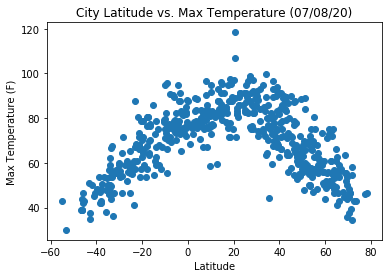

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            label="Cities")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

plt.savefig("out_data/Fig1HW.png")
# Show plot
plt.show()

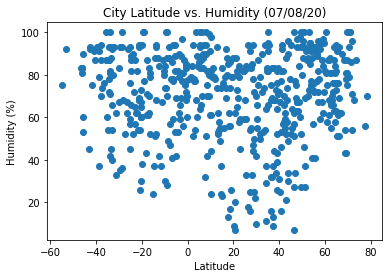

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.savefig("out_data/Fig2HW.png")

# Show plot
plt.show()

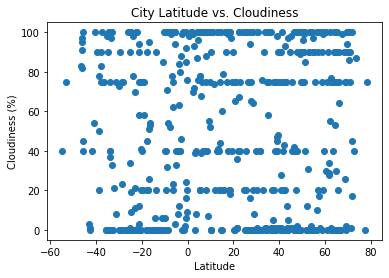

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.savefig("out_data/Fig3HW.png")

# Show plot
plt.show()

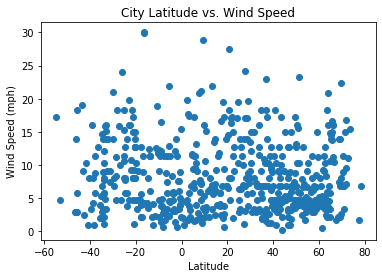

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.savefig("out_data/Fig4HW.png")

# Show plot
plt.show()

In [68]:
#Northern vs SOuthern Hemisphere plots


In [69]:
# Create Northern and Southern Hemisphere DataFrames Greater than or equal to 0 for North indicates a latitude greater than or equal 
#...North as per the values, whereas less than 0 means a latitude in the Southern hemisphere. 
north = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
south = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

#check to make sure new dataframes work, initially tried doing this without the .loc function but indeed did not work
north
south

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
7,mataura,-46.19,168.86,39.00,83,99,3.00,NZ,1594223794
9,ushuaia,-54.80,-68.30,42.80,70,75,2.24,AR,1594223795
10,arraial do cabo,-22.97,-42.03,84.20,48,98,17.22,BR,1594223604
11,ambilobe,-13.20,49.05,76.66,64,81,10.98,MG,1594223795
13,mayumba,-3.43,10.66,75.42,77,30,8.59,GA,1594223796
...,...,...,...,...,...,...,...,...,...
546,tuatapere,-46.13,167.68,39.00,83,100,3.00,NZ,1594223909
548,cururupu,-1.83,-44.87,83.23,76,3,5.21,BR,1594223909
550,byron bay,-28.65,153.62,55.40,100,75,10.29,AU,1594223614
551,lima,-12.04,-77.03,62.60,82,90,4.70,PE,1594223910


Text(0, 0.5, 'Maximum Tmperature')

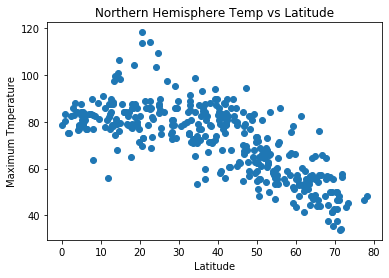

In [70]:
#Temp Vs Latitude  North
x_values =north["Lat"]
y_values = north["Max Temp"]

plt.scatter(x_values, y_values)
plt.title("Northern Hemisphere Temp vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Maximum Tmperature")


Text(0, 0.5, 'Maximum Tmperature')

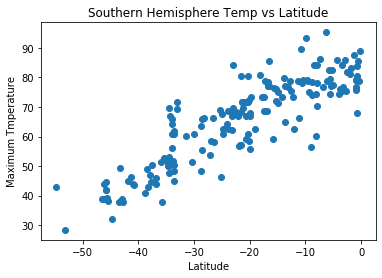

In [71]:
#Temp Vs Latitude  South
x_values =south["Lat"]
y_values = south["Max Temp"]

plt.scatter(x_values, y_values)
plt.title("Southern Hemisphere Temp vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Maximum Tmperature")

In [72]:
#Humidity vs Latitude Linear Regression

Text(0, 0.5, 'Latitude')

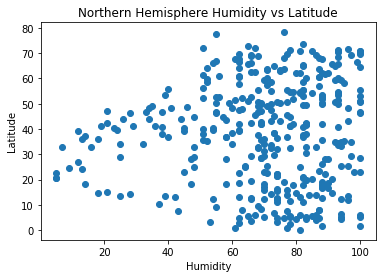

In [73]:
#Humidity vs Latitude North

x_values =north["Humidity"]
y_values = north["Lat"]

plt.scatter(x_values, y_values)
plt.title("Northern Hemisphere Humidity vs Latitude")
plt.xlabel("Humidity")
plt.ylabel("Latitude")


Text(0, 0.5, 'Latitude')

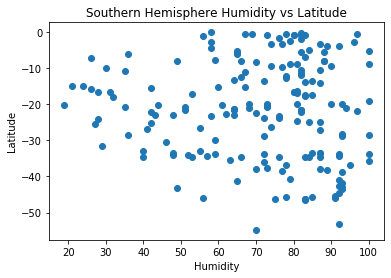

In [74]:
#Humidity vs Latitude South

x_values =south["Humidity"]
y_values = south["Lat"]

plt.scatter(x_values, y_values)
plt.title("Southern Hemisphere Humidity vs Latitude")
plt.xlabel("Humidity")
plt.ylabel("Latitude")

In [75]:
#Wind Speed (mph) vs. Latitude Linear Regression

Text(0, 0.5, 'Latitude')

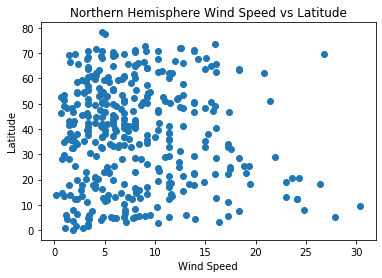

In [76]:
#WInd Speed vs Latitude North

x_values =north["Wind Speed"]
y_values = north["Lat"]

plt.scatter(x_values, y_values)
plt.title("Northern Hemisphere Wind Speed vs Latitude")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")


Text(0, 0.5, 'Latitude')

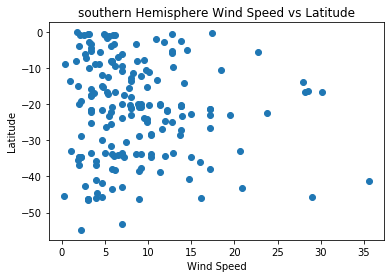

In [77]:
#WInd Speed vs Latitude North

x_values =south["Wind Speed"]
y_values = south["Lat"]

plt.scatter(x_values, y_values)
plt.title("southern Hemisphere Wind Speed vs Latitude")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
